# Aufgabe 2

Solve the Exercise of Exercise 3, Sheet 5 with the **Gauß-Method** and **Randau IIA-Method** with one and two steps (s=1,2). Next solve it with **Lobatto IIIA** with $s=2,3,4$. 

A Reference is given in Olat. We have to compare with the classical method of sheet 5.

The system of exercise 3:

\begin{align*}
x'(t) =x^2(t) \\
t \in ]0,0.9] \\
x(0) = 1
\end{align*}


### Solution Using an Explicit Euler Method

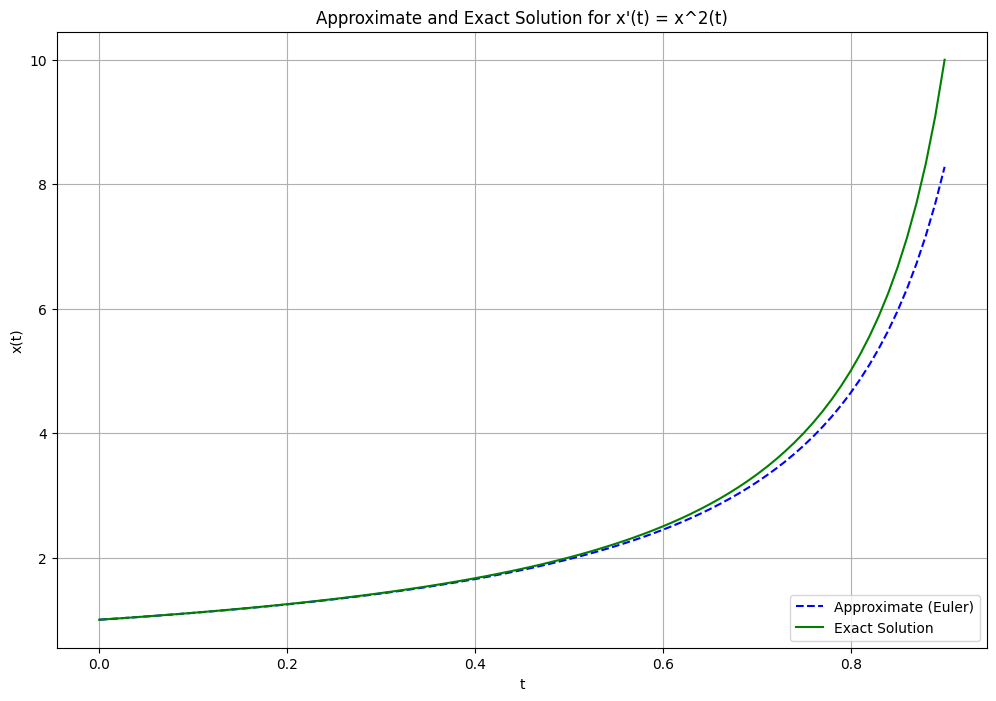

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def explicit_euler(f, t0, t_end, x0, h):
    """
    Implements the explicit Euler method to solve ODEs.
    
    Parameters:
        f: function
            The derivative function f(t, x).
        t0: float
            The initial time.
        t_end: float
            The end time.
        x0: float
            The initial condition x(t0).
        h: float
            The step size.
    
    Returns:
        t: numpy array
            Array of time points.
        x: numpy array
            Array of solution values at each time point.
    """
    t = np.arange(t0, t_end + h, h)
    x = np.zeros(len(t))
    x[0] = x0
    
    for i in range(len(t) - 1):
        x[i + 1] = x[i] + h * f(t[i], x[i])
    
    return t, x

# Define the derivative function
def f(t, x):
    return x**2

# Parameters
t0 = 0
t_end = 0.9
x0 = 1
h = 0.01

# Solve using explicit Euler method
t, x_expl = explicit_euler(f, t0, t_end, x0, h)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(t, x_expl, 'b--', label='Approximate (Euler)')
plt.plot(t, -1 / (t - 1), 'g', label='Exact Solution')
plt.title("Approximate and Exact Solution for x'(t) = x^2(t)")
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

## Collocation method

We consider the initial value problem

\begin{align*}
y' = f(x,y) \\
y(x_0) = y_0
\end{align*}

We search a polynomial of degree $s$ which satifies the following conditions:

\begin{align*}
p(x_0) = y_0 \\
p'(x_0 + c_ih) = f(x_0 + c_ih, p(x_0 + c_ih)), ~ i = 1,...,s
\end{align*}

By using **Definition 4.40** we say that $p$ is the Collocation polynomail with nodes $c_i$. The conditions are the collation conditions.

And using Satz 4.41 we know that collation methods are equivalent to $s$-stage IRK methods with coefficients

\begin{align*}
a_{ij} = \int_0^{c_i} l_j(t) dt \\
b_i = \int_0^1 l_j(t) dt \\
l_j(t) = \prod_{i=1, i \neq j}^s \frac{t - c_i}{c_j - c_i}
\end{align*}


So what we do for the implementation is considering a implicit runge cutta scheme with 

\begin{align*}
Y'_i = f(x_0 + c_ih,Y_i) \\
Y_i = y_0 + h \sum_{j=1}^s a_{ij} Y_j' ~ i = 1,...,s
y_i = y_0 + h \sum_{j=1}^s b_j Y_j'
\end{align*}

**Gauß-Method s= 1**

$b_1 = 1, a_{11} = 1/2$ and $M = \frac{1}{2}+ \frac{1}{2} - 1 = 0$

# Exercise 3

We now consider the Differential Equation

\begin{equation}
y' = -2000(y-cos(x)) ~ y(0) = 0
\end{equation}

on the interval $[0,1.5]$.  Solve this numerically with implicit Euler Method and implicit Midpoint Rule.

## Implicit Runge-Kutta Method

For a initial value problem of the form

\begin{align*}
y' = f(x,y) \\
y(x_0) = y_0
\end{align*}

we define a implicit Runge-Kutta method with the formulas

\begin{align*}
Y_i' = f(x_0+ c_ih,Y_i) \\
Y_i = y_0 + h \sum_{j=1}^s a_{ij}Y_j' ~ i=1,...,s \\
y_1 = y_0 + h\sum_{j=1}^s b_j Y'_j
\end{align*}

where $Y_I$ are the **steps** of the method and $s$ is the **number of stages**

The coefficients $a_{ij}$, $b_j$ and $c_i$ are given in Butcher-Tableau's

### Implicit Euler Method

We have $s=1$ and the Butcher-Tableau is given by

\begin{align*}
c | A \\
-- | b^T \\
\end{align*}

which is in the case of the implicit Euler method

\begin{align*}
1 | 1 \\
-- | 1 
\end{align*}

we have $s=1$ steps and 

$Y_1' = f(x_0 + h, Y_1), Y_1 = y_0 + hY_1' \Rightarrow y_1 = y_0 + hf(x_0 + h,y_1)$



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

def implicit_euler(f,y0,x_range,h, tol=1e-8,max_iter=100):
    """ 
    Solves y'=f(x,y) using implicit Euler method.

    Parameters:
        f: function
            The derivative function f(x, y).
        y0: float
            The initial condition y(x0).
        x_range: tuple
            The range of x values (x0, x_end).
        h: float
            The step size.
        tol: float
            Tolerance for the root-finding method.
        max_iter: int
            Maximum number of iterations for the root-finding method.

    Returns:
        x: numpy array
            Array of x values.
        y: numpy array
            Array of solution values at each x value.
    """
    x0,x_end = x_range
    x = np.arange(x0, x_end + h, h)
    y = np.zeros_like(x)
    y[0] = y0

    for n in range(len(x) - 1):
        x_n = x[n]
        x_n1 = x[n + 1]

        # Define Function to find roots

        def G(y_guess):
            return y_guess - y[n] - h * f(x_n1, y_guess)
        
        # Use Newton's method to find the root
        # Make explicit Euler initial guess
        y_guess = y[n] + h * f(x_n, y[n])

        try:
            y[n+1] = newton(G, y_guess, tol=tol, maxiter=max_iter)
        except RuntimeError:
            print(f"Newton's method did not converge at n={n}, x={x_n}")
            y[n+1] = y[n]
    
    return x, y

/tmp/ipykernel_222801/1591676519.py:7: RuntimeWarning: overflow encountered in exp
  return (2000 * np.sin(x))/4000001 + (4000000*np.cos(x))/4000001 - (4000000)/(4000001 * np.exp(2000*x))
/tmp/ipykernel_222801/1591676519.py:7: RuntimeWarning: overflow encountered in multiply
  return (2000 * np.sin(x))/4000001 + (4000000*np.cos(x))/4000001 - (4000000)/(4000001 * np.exp(2000*x))


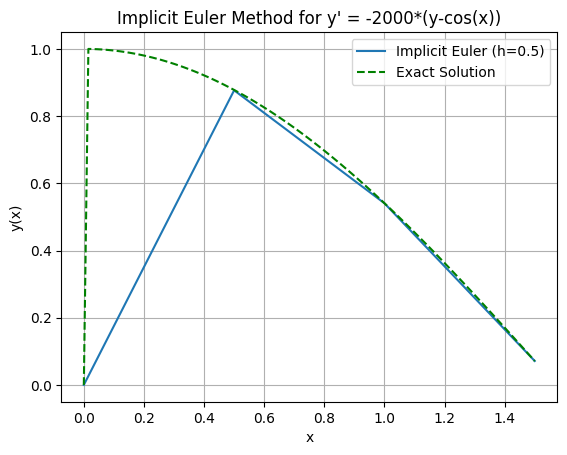

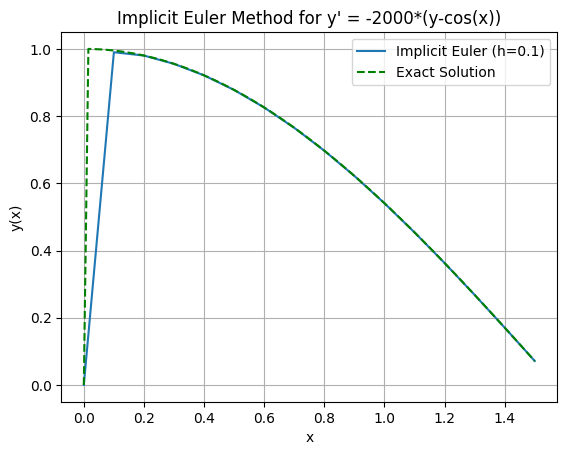

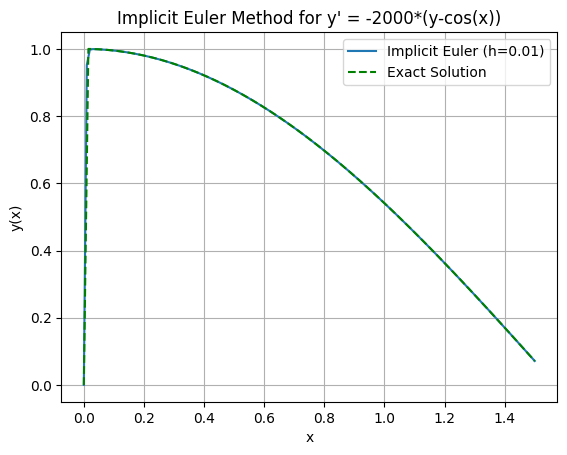

In [3]:
# Define the ODE:
def f(x, y):
    return -2000*(y-np.cos(x))

# Define exact solution
def exact_solution(x):
    return (2000 * np.sin(x))/4000001 + (4000000*np.cos(x))/4000001 - (4000000)/(4000001 * np.exp(2000*x))

# Parameters
y0 = 0
x_range = (0,1.5)
# Use different step sizes
h_values = [0.5, 0.1, 0.01]

# Solve using implicit Euler method for different step sizes
for h in h_values:
    x, y_imp = implicit_euler(f, y0, x_range, h)
    x_exact_range =  np.linspace(x_range[0], x_range[1], 100)
    # Calculate the exact solution for comparison
    y_exact = exact_solution(x_exact_range)

    # Plot the results
    plt.plot(x, y_imp, label=f'Implicit Euler (h={h})')
    plt.plot(x_exact_range, y_exact, 'g--', label='Exact Solution')
    plt.title("Implicit Euler Method for y' = -2000*(y-cos(x))")
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.grid()
    plt.legend(loc='upper right')
    plt.show()




We see quite good in the plot that the implicit Euler method is quite ok for approximating the solution of the differential equation.

Problem is that we need small step size because the stiffness of the equation

### Implicit Midpoint Rule

For the implicit Midpoint Rule we have $s=2$ and the Butcher-Tableau is given by


\begin{align*}
1/2 | 1/2 \\
-- | 1 \\
\end{align*}

Using the Butcher-Tableau we have the update formula

\begin{align*}
k = f(x_n + ch, y_n + hAk) \\
y_{n+1} = y_n + h \sum_{i=1}^s b_i k_i
\end{align*}

We have for this $s=1$ step method the system of equations

\begin{align*}
k = f(x_n + \frac{h}{2}, y_n + \frac{h}{2}k)
\end{align*}

we solve with newtons method for k


I think it is a more smart approach to write a general implicit Runge Kutta solver for the one step method, maybe we can then use it even for higher step methods.


In [4]:
from scipy.optimize import root

def newton_solve(F,k0):
    sol = root(F, k0)
    if sol.success:
        return sol.x
    else:
        raise ValueError("Root finding did not converge")
    
def solve_implicit_rk(f,A,b,c,y0,x0,x_end,h):
    """
    Solves y'=f(x,y) using implicit Runge-Kutta method.

    Parameters:
        f: function
            The derivative function f(x, y).

        A: 2D array
            Coefficients for the implicit RK method.
        b: 1D array
            Weights for the implicit RK method.
        c: 1D array
            Nodes for the implicit RK method.
        y0: float
            The initial condition y(x0).
        x0: float
            The initial x value.
        x_end: float
            The end x value.
        h: float
            The step size.

    Returns:
        x: numpy array
            Array of x values.
        y: numpy array
            Array of solution values at each x value.
    """
    N = int((x_end - x0) / h)
    x_values = np.linspace(x0, x_end, N + 1)  
    y_values = np.zeros(N + 1)
    y_values[0] = y0

    for n in range(N):
        xn,yn = x_values[n], y_values[n]

        def F(k):
            x_c = xn + c[0] * h
            y_c = yn + h*A[0,0]*k[0]
            return [k[0] - f(x_c,y_c)]
        
        k0 = [f(xn,yn)]
        k = newton_solve(F,k0)

        y_values[n + 1] = yn + h *b[0] * k[0]

    return x_values, y_values

# Implicit Euler
A_euler = np.array([[1.0]])
b_euler = np.array([1.0])
c_euler = np.array([1.0])

# Implicit Midpoint
A_mid = np.array([[0.5]])
b_mid = np.array([1.0])
c_mid = np.array([0.5])



/tmp/ipykernel_222801/1591676519.py:7: RuntimeWarning: overflow encountered in exp
  return (2000 * np.sin(x))/4000001 + (4000000*np.cos(x))/4000001 - (4000000)/(4000001 * np.exp(2000*x))
/tmp/ipykernel_222801/1591676519.py:7: RuntimeWarning: overflow encountered in multiply
  return (2000 * np.sin(x))/4000001 + (4000000*np.cos(x))/4000001 - (4000000)/(4000001 * np.exp(2000*x))


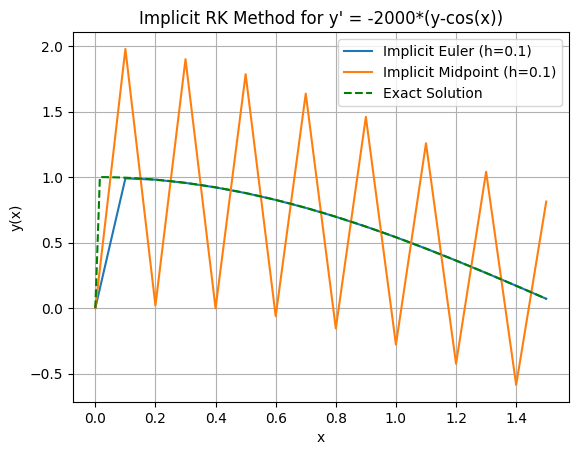

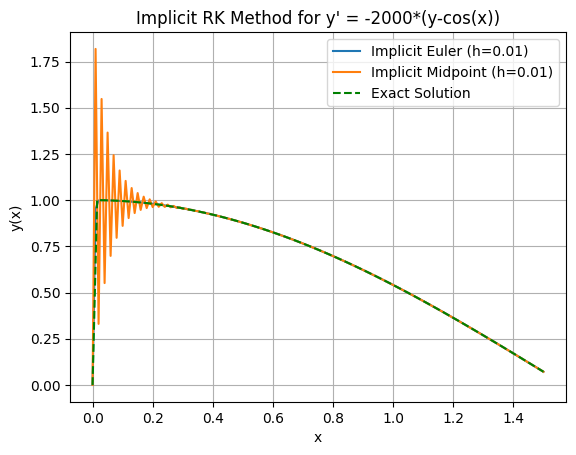

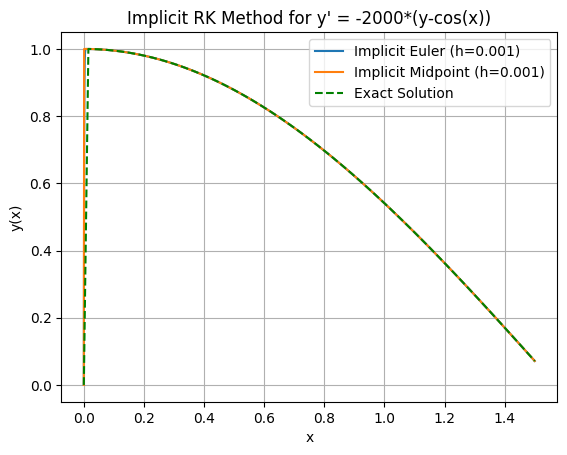

In [5]:
# Parameters
y0 = 0
x0 = 0
x_end = 1.5
h = [0.1, 0.01, 0.001]

# Solve using implicit RK method for different step sizes
for step in h:
    x_euler, y_euler = solve_implicit_rk(f, A_euler, b_euler, c_euler, y0, x0, x_end, step)
    x_mid, y_mid = solve_implicit_rk(f, A_mid, b_mid, c_mid, y0, x0, x_end, step)

    # Calculate the exact solution for comparison
    x_exact_range = np.linspace(x0, x_end, 100)
    y_exact = exact_solution(x_exact_range)

    # Plot the results
    plt.plot(x_euler, y_euler, label=f'Implicit Euler (h={step})')
    plt.plot(x_mid, y_mid, label=f'Implicit Midpoint (h={step})')
    plt.plot(x_exact_range, y_exact, 'g--', label='Exact Solution')
    plt.title("Implicit RK Method for y' = -2000*(y-cos(x))")
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.grid()
    plt.legend(loc='upper right')
    plt.show()

Ok this is interesting, implicit midpoint only works when h is small enough, otherwise we get a oscillation in the solution

# Exercise 4

Solve the follwing System with the implicit Euler Method and Implicit Mipoint Rule


\begin{align*}
u' = -c_3 u² + c_4uv \\
v' = c_1 v - c_2 v^2 - c_4 uv
\end{align*}

$c_1v$ is growth of prey, $-c_2v^2$ is sozial difficulties in prey, $-c_3u^2$ social difficulties in predator, $+- c_4uv$ is the factor predator eats prey

We have the parameters

+ $c_1 = 4$
+ $c_2 = 0.002$
+ $c_3 = 0.05$

As a starting value we take $u_0 = 100, v_0 = 2000$.  Use different step sizes and show the time evolution of this population

In [13]:
# We use a similar implementation like from above
import numpy as np
from scipy.optimize import fsolve

def newton_solve(F,k0):
    sol = fsolve(F, k0,xtol=1e-6, maxfev=1000)
    return sol
    
# define implicit one stage IRK method
def solve_implicit_rk_system(f,A,b,c,y0,x0,x_end,h):
    """ 
    Solves the System y'= f(x,y) for a system of ODEs using implicit Runge-Kutta method

    Parameters:
        f: function
            The derivative function f(x, y).

        A: 2D array
            Coefficients for the implicit RK method.
        b: 1D array
            Weights for the implicit RK method.
        c: 1D array
            Nodes for the implicit RK method.
        y0: numpy array
            The initial condition y(x0).
        x0: float
            The initial x value.
        x_end: float
            The end x value.
        h: float
            The step size.
    """

    N = int((x_end - x0) / h)
    x_values = np.linspace(x0,x_end,N+1)
    y_values = np.zeros((N+1,2)) # because of two equations
    y_values[0] = y0

    for n in range(N):
        xn,yn = x_values[n], y_values[n]

        def F(k):
            x_c = xn + c[0] * h
            y_c = yn + h*A[0,0]*k[0]
            return k - f(x_c,y_c)
        
        k0 = f(xn,yn) # Initial guess = explicit Euler step
        try:
            k = newton_solve(F,k0)
            y_values[n + 1] = yn + h *b[0] * k
        except:
            # If solver fails reduce step size to half
            h_new = h / 2
            x_temp,y_temp = solve_implicit_rk_system(f,A,b,c,yn,xn,xn+h_new,h_new)
            y_values[n + 1] = y_temp[-1]
    return x_values, y_values



In [21]:
# Define the system of the model

def prediator_prey(x,y):
    """ 
    Defines the system of equations for the predator-prey model.
    """
    u,v = y
    c1,c2,c3,c4 = 4,0.002, 0.3, 0.05
    du_dt = -c3*u**2 + c4*u*v 
    dv_dt = c1*v - c2*v**2 -c4*u*v
    return np.array([du_dt, dv_dt])

# Parameters and Butcher Tableau
u0,v0 = 100, 2000
x0 = 0
x_end = 5 # Lets just see :)
h = 0.01 # we will also adjust this later
y0 = np.array([u0,v0])




# Implicit Euler
A_euler = np.array([[1.0]])
b_euler = np.array([1.0])
c_euler = np.array([1.0])

# Solve with euler method

x_euler, y_euler = solve_implicit_rk_system(prediator_prey, A_euler, b_euler, c_euler, y0, x0, x_end, h)

# Implicit Midpoint
A_mid = np.array([[0.5]])
b_mid = np.array([1.0])
c_mid = np.array([0.5])

# Solve with midpoint method

x_mid, y_mid = solve_implicit_rk_system(prediator_prey, A_mid, b_mid, c_mid, y0, x0, x_end, h)




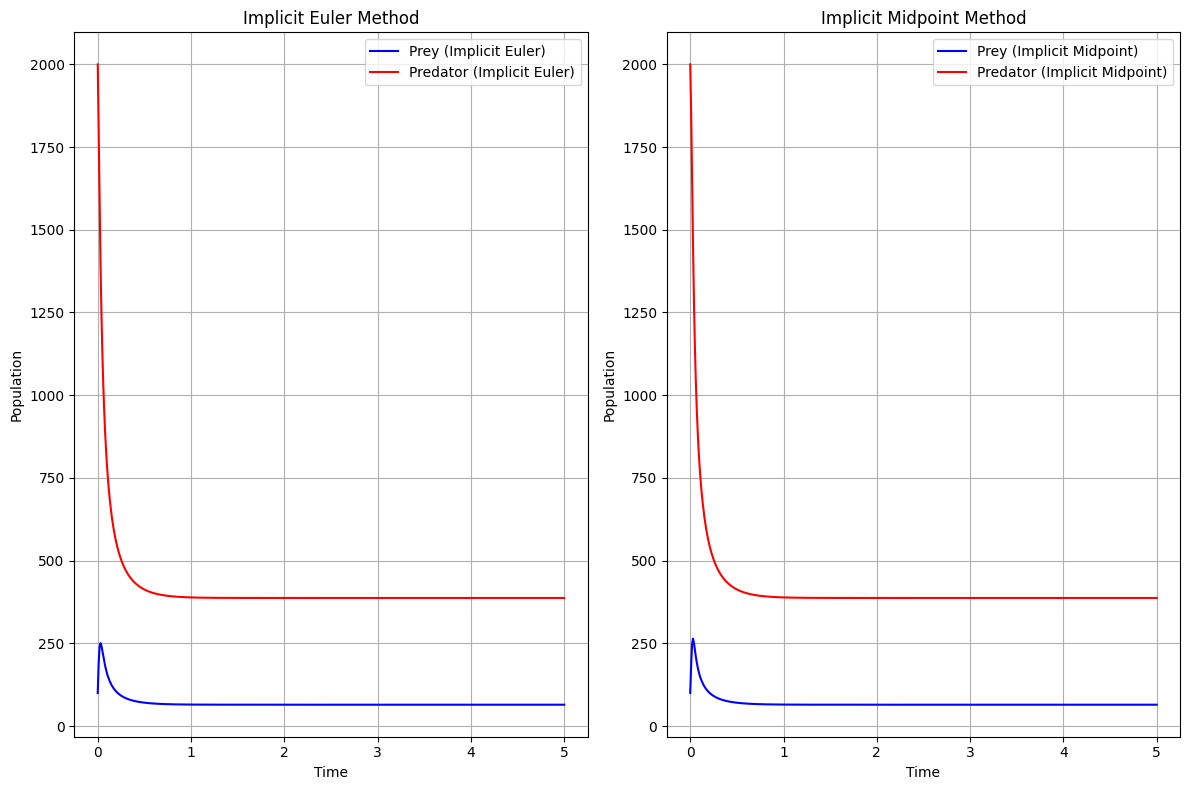

In [23]:
# Plot the results

plt.figure(figsize=(12, 8))

# Implicit Euler
plt.subplot(1, 2, 1)
plt.plot(x_euler, y_euler[:, 0], label='Prey (Implicit Euler)', color='blue')
plt.plot(x_euler, y_euler[:, 1], label='Predator (Implicit Euler)', color='red')
plt.title('Implicit Euler Method')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid()

# Implicit Midpoint
plt.subplot(1, 2, 2)
plt.plot(x_mid, y_mid[:, 0], label='Prey (Implicit Midpoint)', color='blue')
plt.plot(x_mid, y_mid[:, 1], label='Predator (Implicit Midpoint)', color='red')
plt.title('Implicit Midpoint Method')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()



We now consider this stiff system for different step sizes

/home/lme/.conda/envs/molecular_m/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/tmp/ipykernel_222801/3328122163.py:9: RuntimeWarning: overflow encountered in scalar multiply
  du_dt = -c3*u**2 + c4*u*v
/tmp/ipykernel_222801/3328122163.py:10: RuntimeWarning: overflow encountered in scalar power
  dv_dt = c1*v - c2*v**2 -c4*u*v
/tmp/ipykernel_222801/3328122163.py:10: RuntimeWarning: overflow encountered in scalar multiply
  dv_dt = c1*v - c2*v**2 -c4*u*v
/tmp/ipykernel_222801/3328122163.py:9: RuntimeWarning: invalid value encountered in scalar add
  du_dt = -c3*u**2 + c4*u*v
/tmp/ipykernel_222801/3328122163.py:10: RuntimeWarning: invalid value encountered in scalar subtract
  dv_dt = c1*v - c2*v**2 -c4*u*v
/tmp/ipykernel_222801/3690131893.py:44: RuntimeWarning: invalid value encountered in add
  y_c = yn + h*A[0,

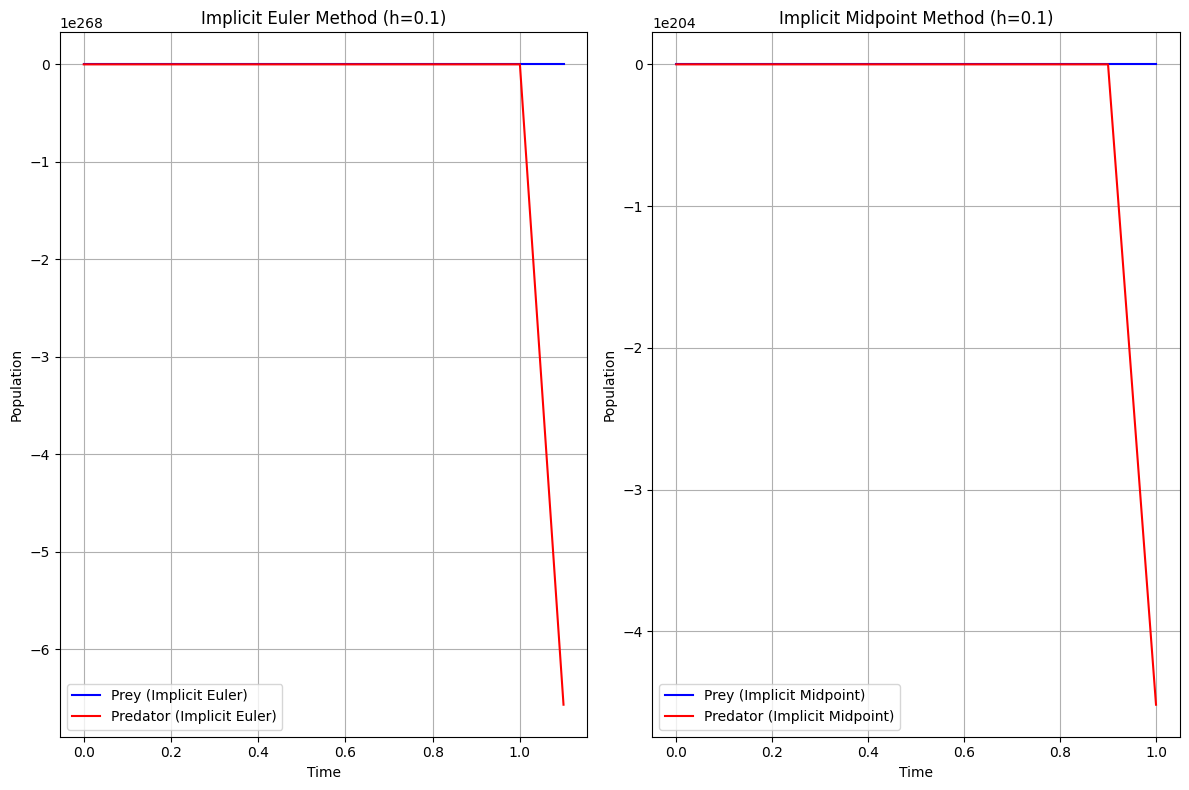

/tmp/ipykernel_222801/3328122163.py:9: RuntimeWarning: overflow encountered in scalar power
  du_dt = -c3*u**2 + c4*u*v
/tmp/ipykernel_222801/3690131893.py:45: RuntimeWarning: invalid value encountered in subtract
  return k - f(x_c,y_c)
/home/lme/.conda/envs/molecular_m/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


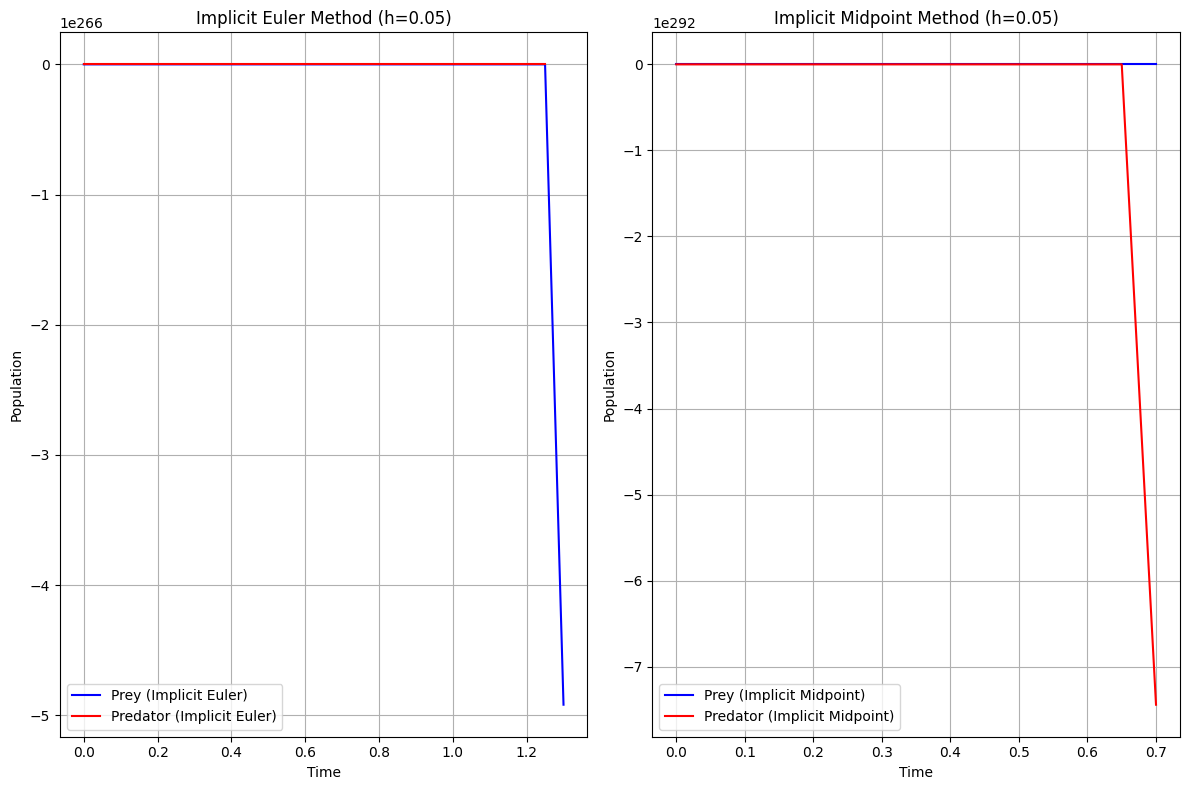

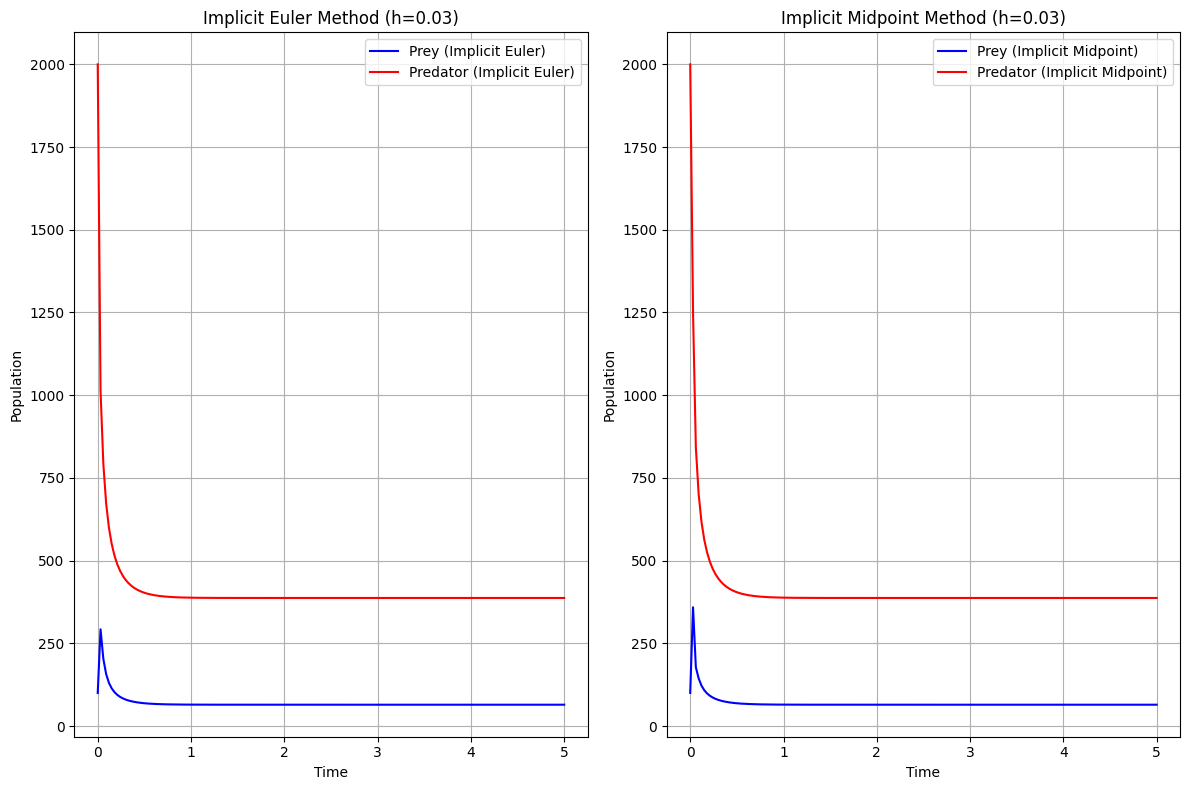

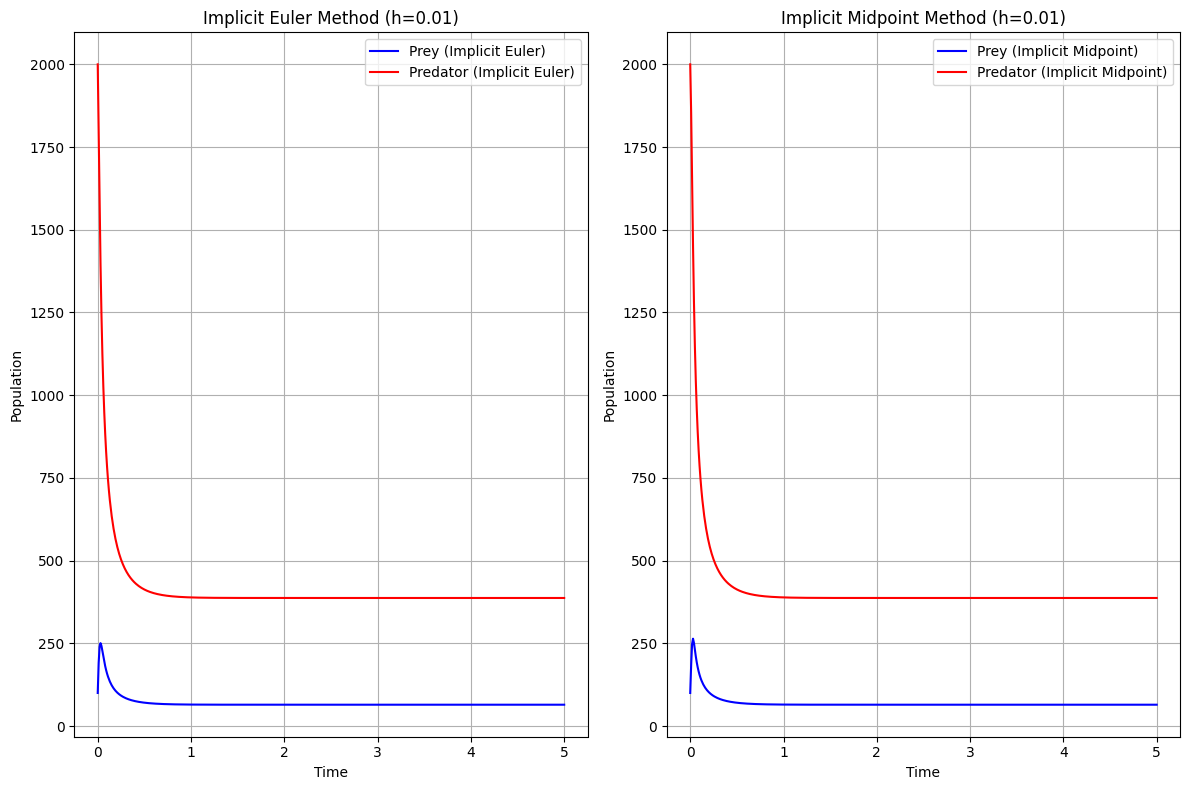

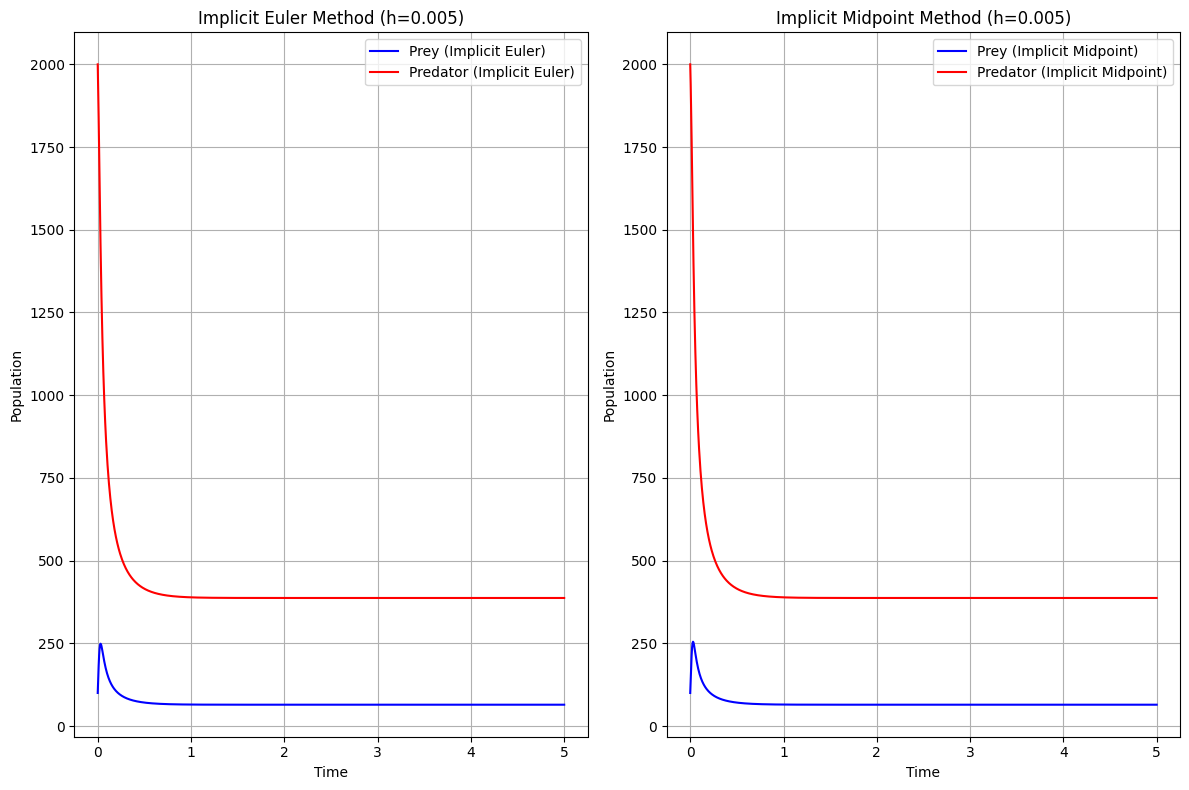

In [26]:
step_sizes = [0.1, 0.05, 0.03,0.01,0.005]

for step in step_sizes:
    x_euler, y_euler = solve_implicit_rk_system(prediator_prey, A_euler, b_euler, c_euler, y0, x0, x_end, step)
    x_mid, y_mid = solve_implicit_rk_system(prediator_prey, A_mid, b_mid, c_mid, y0, x0, x_end, step)

    # Make two subplots each
    plt.figure(figsize=(12, 8))
    # Implicit Euler
    plt.subplot(1, 2, 1)
    plt.plot(x_euler, y_euler[:, 0], label='Prey (Implicit Euler)', color='blue')
    plt.plot(x_euler, y_euler[:, 1], label='Predator (Implicit Euler)', color='red')
    plt.title(f'Implicit Euler Method (h={step})')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.grid()
    # Implicit Midpoint
    plt.subplot(1, 2, 2)
    plt.plot(x_mid, y_mid[:, 0], label='Prey (Implicit Midpoint)', color='blue')
    plt.plot(x_mid, y_mid[:, 1], label='Predator (Implicit Midpoint)', color='red')
    plt.title(f'Implicit Midpoint Method (h={step})')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()





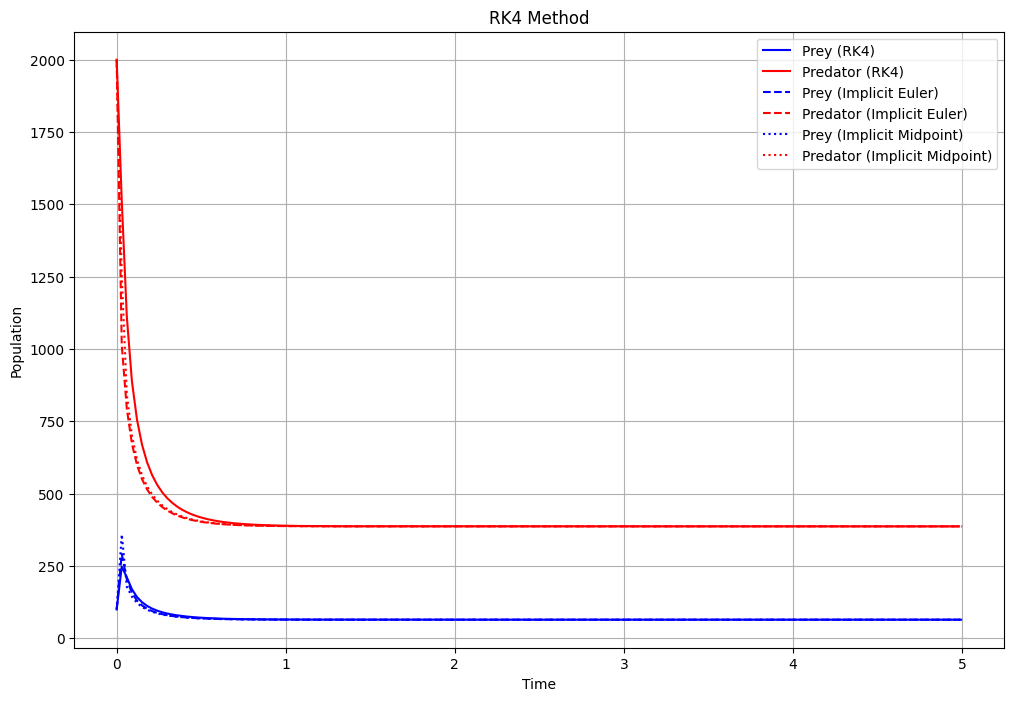

In [43]:
# Now compare with RK4 method
from scipy.integrate import solve_ivp

def rk4_system(f, y0, t_span, h):
    sol = solve_ivp(f, t_span, y0, method='RK45', t_eval=np.arange(t_span[0], t_span[1], h))
    return sol.t, sol.y.T

# Solve using RK4 method
t_span = (x0, x_end)
y0 = np.array([u0, v0])
h = 0.03
t_rk4, y_rk4 = rk4_system(prediator_prey, y0, t_span, h)
x_euler, y_euler = solve_implicit_rk_system(prediator_prey, A_euler, b_euler, c_euler, y0, x0, x_end, h)
x_mid, y_mid = solve_implicit_rk_system(prediator_prey, A_mid, b_mid, c_mid, y0, x0, x_end, h)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(t_rk4, y_rk4[:, 0], label='Prey (RK4)', color='blue')
plt.plot(t_rk4, y_rk4[:, 1], label='Predator (RK4)', color='red')
# Plot implicit Euler and midpoint for comparison
plt.plot(x_euler, y_euler[:, 0], 'b--', label='Prey (Implicit Euler)')
plt.plot(x_euler, y_euler[:, 1], 'r--', label='Predator (Implicit Euler)')
plt.plot(x_mid, y_mid[:, 0], 'b:', label='Prey (Implicit Midpoint)')
plt.plot(x_mid, y_mid[:, 1], 'r:', label='Predator (Implicit Midpoint)')

plt.title('RK4 Method')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.show()


Clearly we see that if we use the implicit we get a better approximation of the stiff system. But again problem here is the step size we also see that to big step sizes lead to problems of the implicit methods